In [2]:
import time

import numpy as np
import matplotlib.pyplot as plt

import utils

# %matplotlib nbagg

In [3]:
%ls -R spectra/

spectra/:
ardata.fits  HD110379/  HD186791/  X0319/  X0386/  X0538/  X0771/

spectra/HD110379:
BG20000                             tellstar_qvir_ordens_finalglue.fits
obs_HD110379_ordens_finalglue.fits

spectra/HD186791:
BG20000                             tellstar_35aql_ordens_finalglue.fits
obs_HD186791_ordens_finalglue.fits

spectra/X0319:
X0319_N_O_E.fits            X0319_U_O_E.fits      X0319_V_O_E.fits
X0319_N_O_E_TAC_final.fits  X0319_U_O_E_TAC.fits  X0319_V_O_E_TAC_final.fits
X0319_N_O_E_TRA.fits        X0319_U_O_E_TRA.fits  X0319_V_O_E_TRA.fits

spectra/X0386:
X0386_N_N_E.fits            X0386_U_N_E.fits      X0386_V_N_E.fits
X0386_N_N_E_TAC_final.fits  X0386_U_N_E_TAC.fits  X0386_V_N_E_TAC_final.fits
X0386_N_N_E_TRA.fits        X0386_U_N_E_TRA.fits  X0386_V_N_E_TRA.fits

spectra/X0538:
X0538_N_N_E.fits            X0538_U_N_E.fits      X0538_V_N_E.fits
X0538_N_N_E_TAC_final.fits  X0538_U_N_E_TAC.fits  X0538_V_N_E_TAC_final.fits
X0538_N_N_E_TRA.fits        X0538_U_N_E_TRA.fits 

In [4]:
obs_flux, obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0319/X0319_V_O_E.fits')
tel_flux, tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0319/X0319_V_O_E_TRA.fits')
corr_flux, corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0319/X0319_V_O_E_TAC_final.fits')

In [5]:
# indexes on flux array that represent the interval of 850 to 880 nm
START = 1000
END = len(obs_flux)

In [6]:
obs_flux = obs_flux[START: END]
obs_wl = obs_wl[START: END]

tel_flux = tel_flux[START: END]
tel_wl = tel_wl[START: END]

corr_flux = corr_flux[START: END]
corr_wl = corr_wl[START: END]

In [7]:
def average_of_middle_elements(flux, size=20):
#     mid_idx = int(len(flux) / 2)
#     mid_values = flux[mid_idx - int(size/2):mid_idx + int(size/2) + 1]
    
    return np.amax(flux) / 1.01

In [8]:
obs_avg_flux = average_of_middle_elements(obs_flux)
obs_avg_flux

441019.18316831684

In [9]:
corr_avg_flux = average_of_middle_elements(obs_flux)
corr_normalized_flux = corr_flux / corr_avg_flux

In [10]:
obs_normalized_flux = obs_flux / obs_avg_flux

In [11]:
len(obs_normalized_flux)

31423

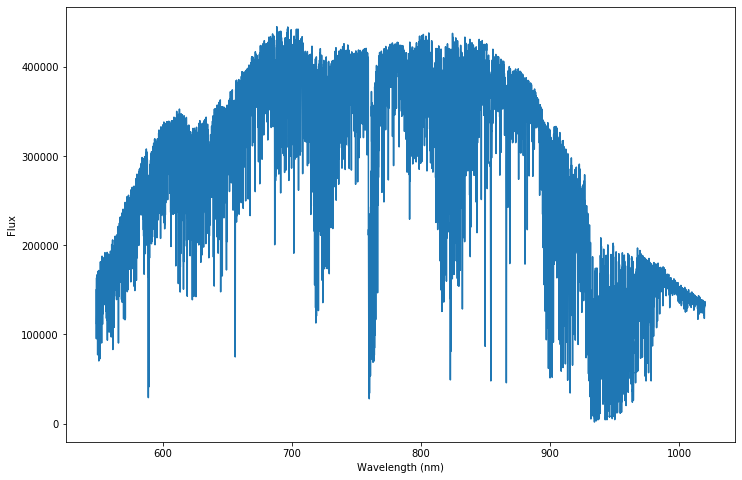

In [12]:
utils.plot_spectrum(obs_flux, obs_wl)

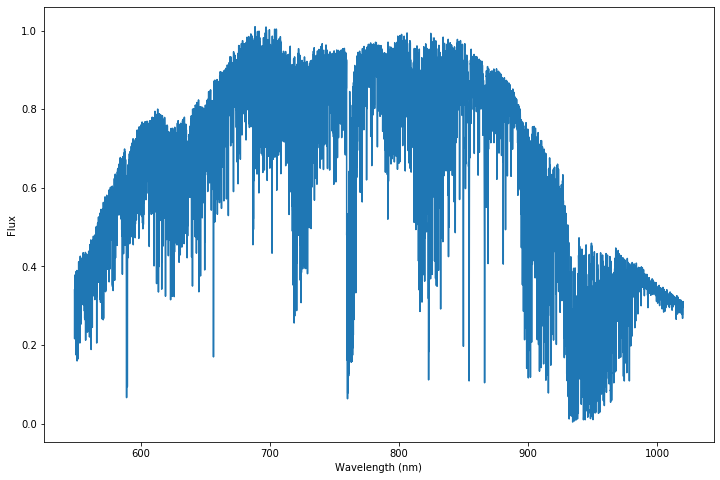

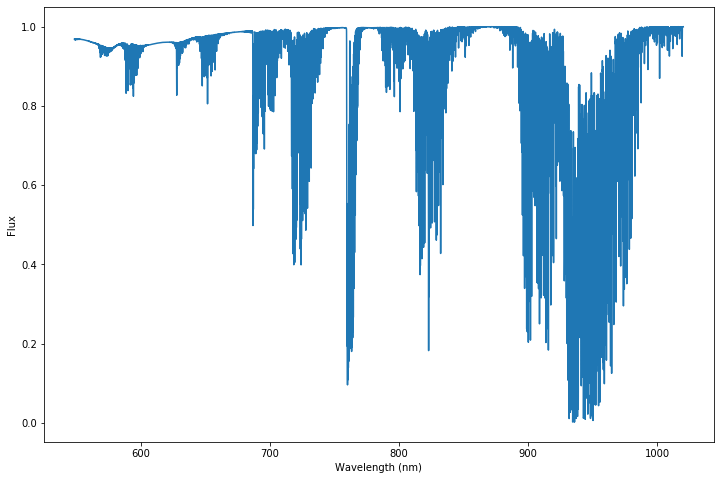

In [13]:
utils.plot_spectrum(obs_normalized_flux, obs_wl)
utils.plot_spectrum(tel_flux, tel_wl)

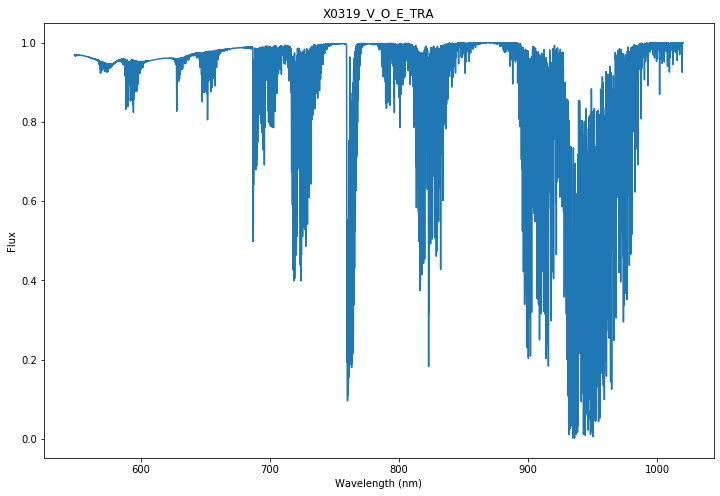

In [14]:
# plt.plot(obs_wl, obs_normalized_flux, '-')
plt.plot(tel_wl, tel_flux, '-')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux')
plt.title('X0319_V_O_E_TRA')
plt.show()

Text(0.5, 1.0, 'X0319_V_O_E corrected')

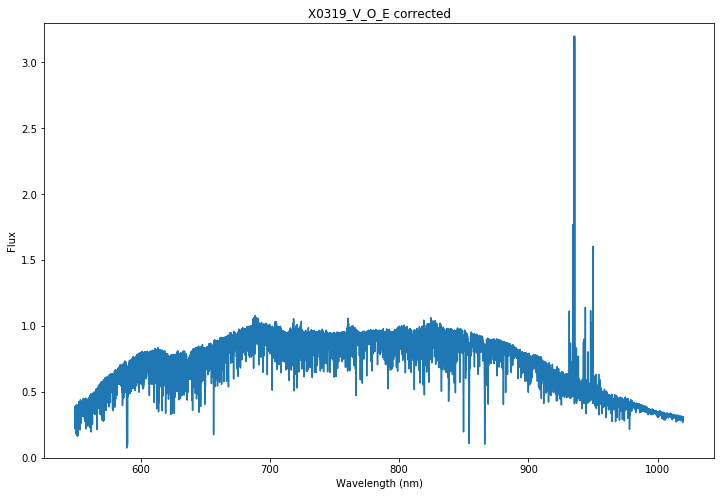

In [15]:
div = obs_normalized_flux / tel_flux
# plt.plot(obs_wl, obs_normalized_flux, '-')
plt.plot(obs_wl, div)
plt.ylim(0, 3.3)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux')
plt.title('X0319_V_O_E corrected')
# plt.plot(obs_wl, div)

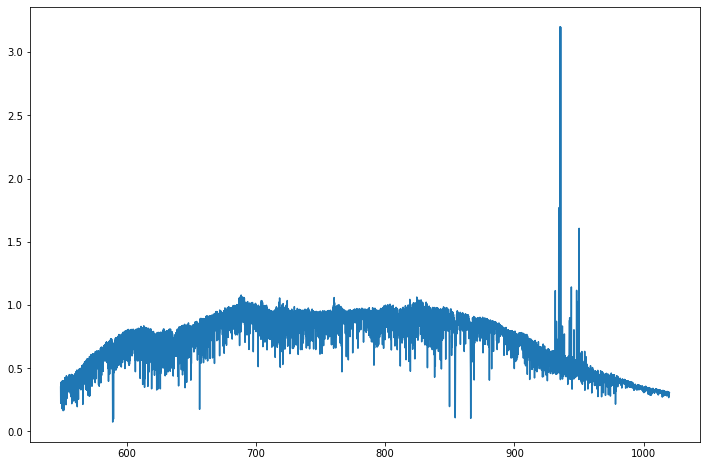

In [16]:
plt.plot(obs_wl, div)
# plt.plot(corr_wl, corr_normalized_flux)

Distance: 7097.934349330831
Are all warp path indices aligned? False


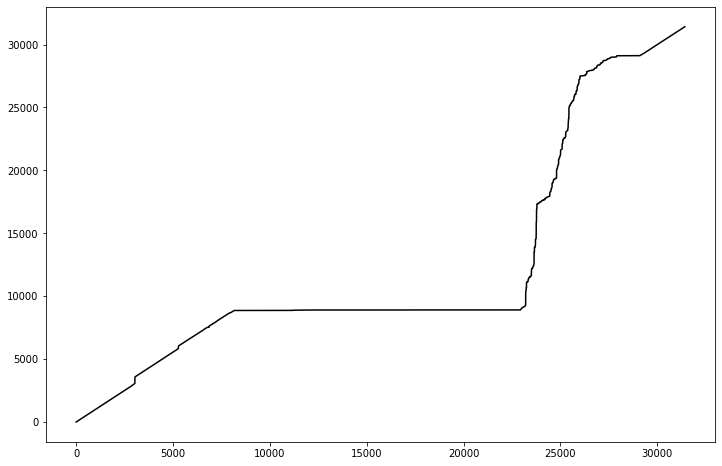

Elapsed time in seconds: 1.0803513526916504


In [17]:
start = time.time()

dtw_path = utils.fast_dtw_on_stellar_spectra(tel_flux, obs_normalized_flux)

end = time.time()
print('Elapsed time in seconds: {}'.format(end - start))

In [18]:
aligned_tel = utils.align_sequence_dtw_path(dtw_path[0], tel_flux)

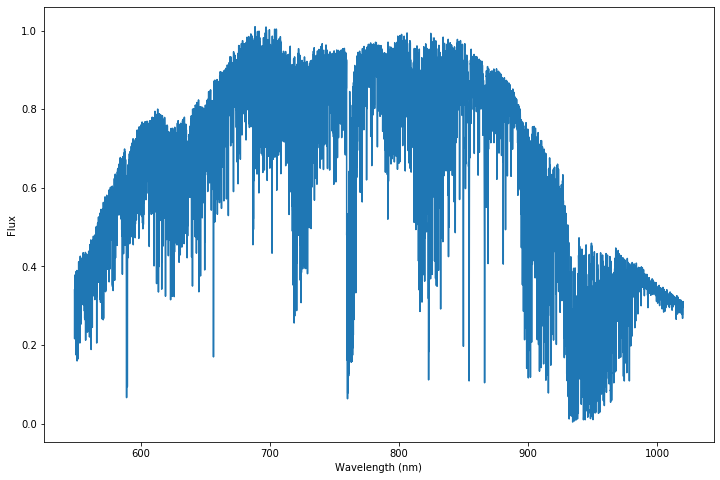

In [25]:
utils.plot_spectrum(obs_normalized_flux, obs_wl)

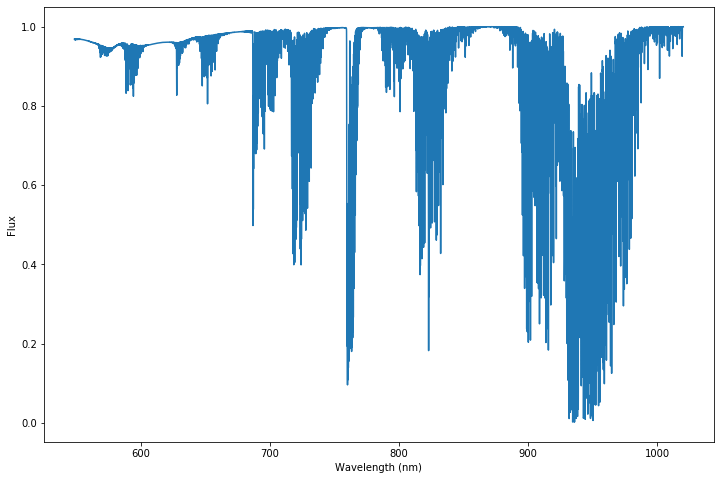

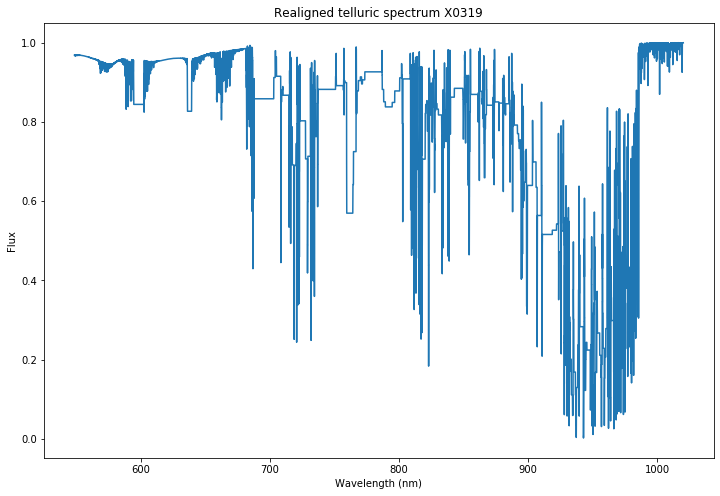

In [30]:
utils.plot_spectrum(tel_flux, tel_wl)
utils.plot_spectrum(aligned_tel, tel_wl, 'Realigned telluric spectrum X0319')

In [21]:
corr_avg_flux = average_of_middle_elements(corr_flux)
corr_normalized_flux = corr_flux / corr_avg_flux

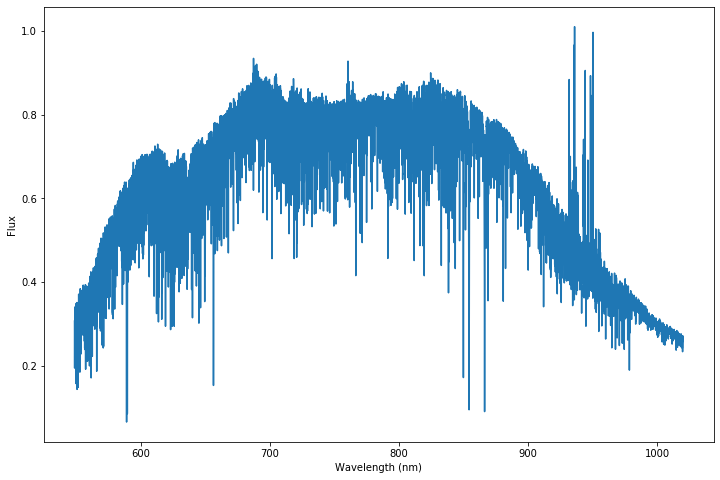

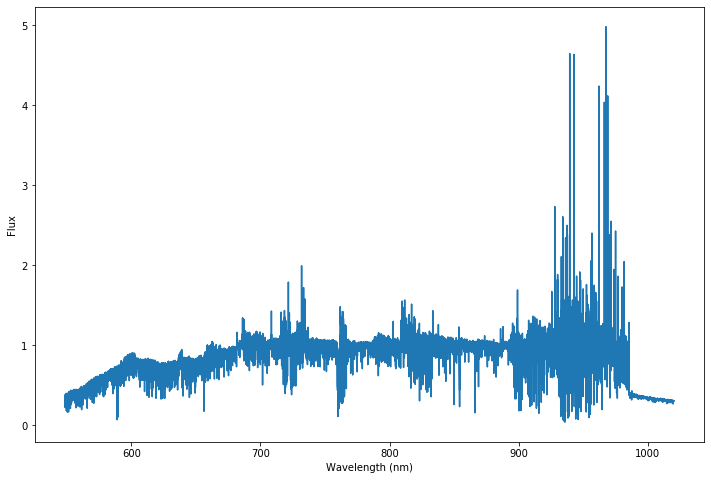

In [28]:
utils.plot_spectrum(corr_normalized_flux, corr_wl)

divided_flux = obs_normalized_flux / aligned_tel
# clipped_divided_flux = np.clip(divided_flux, corr_normalized_flux.min(), corr_normalized_flux.max())
clipped_divided_flux = divided_flux
utils.plot_spectrum(clipped_divided_flux, obs_wl)